In [8]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
sig_beta = HaloModel.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)

# v_mins
n = 200
v = linspace(0.01,750.0,n)

# Times
ndays = 100
days = linspace(0.0,365.0-365.0/ndays,ndays)

# Calculate everything
fv_Iso = zeros(shape=(ndays,n))
fv_Iso_gf = zeros(shape=(ndays,n))
fv_Saus = zeros(shape=(ndays,n))
fv_Saus_gf = zeros(shape=(ndays,n))
for i in range(0,ndays):
    fv_Iso[i,:] = SpeedDist_Triaxial(v,days[i],sig_iso)
    fv_Iso_gf[i,:] = SpeedDist_Triaxial(v,days[i],sig_iso,GravFocus=True)
    
    fv_Saus[i,:] = SpeedDist_Triaxial(v,days[i],sig_beta)
    fv_Saus_gf[i,:] = SpeedDist_Triaxial(v,days[i],sig_beta,GravFocus=True)
    
    print('day = ',i,'of',ndays,sum(fv_Saus_gf[i,:]),sum(fv_Saus_gf[i,:]))

day =  0 of 100 0.26749071906981736 0.26749071906981736
day =  1 of 100 0.2676855653411721 0.2676855653411721
day =  2 of 100 0.26779538064571173 0.26779538064571173
day =  3 of 100 0.26780291081900365 0.26780291081900365
day =  4 of 100 0.26775561853334784 0.26775561853334784
day =  5 of 100 0.2676515087011003 0.2676515087011003
day =  6 of 100 0.26752522270409596 0.26752522270409596
day =  7 of 100 0.2674035183595106 0.2674035183595106
day =  8 of 100 0.26726612084922224 0.26726612084922224
day =  9 of 100 0.26716289961349143 0.26716289961349143
day =  10 of 100 0.26705956264991854 0.26705956264991854
day =  11 of 100 0.26694769575557625 0.26694769575557625
day =  12 of 100 0.2668751599178539 0.2668751599178539
day =  13 of 100 0.2668025217333656 0.2668025217333656
day =  14 of 100 0.2667318599606614 0.2667318599606614
day =  15 of 100 0.2666640312819566 0.2666640312819566
day =  16 of 100 0.26661954575892755 0.26661954575892755
day =  17 of 100 0.2665813222102229 0.2665813222102229


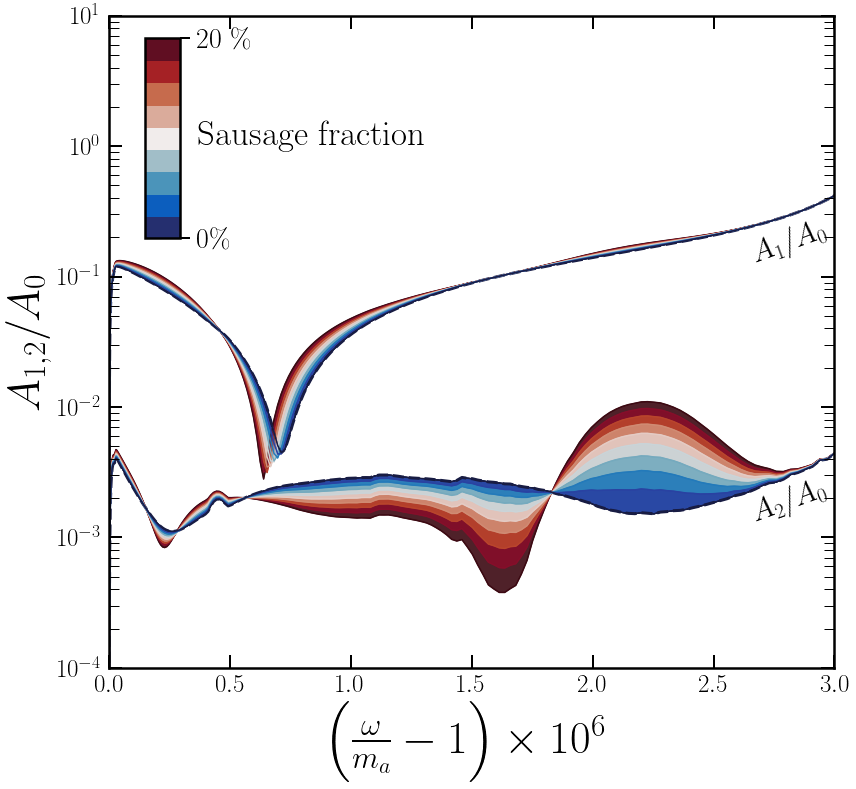

In [ ]:
from PlotFuncs import *

from numpy.fft import fft

import cmocean

nt = size(days)
zorder =0

# Get all fourier components
def FourierComponents(gmin,nc):
    nv = shape(gmin)[1]
    a0 = zeros(shape=nv)
    b = zeros(shape=(nc,nv))
    a = zeros(shape=(nc,nv))
    for i in range(0,nv):
        y = gmin[:,i]
        yfft = fft(y)/(1.0*nt)
        yfft = yfft[0:(nc+1)]
        a0[i] = real(yfft[0])
        a[:,i] = 2*real(yfft[1:])
        b[:,i] = -2*imag(yfft[1:])
    return a0,a,b
nc = 5



n_xi = 10
xi_max = 0.2
xi_vals = linspace(0.0,xi_max,n_xi)

xlab = r"$\left(\frac{\omega}{m_a} - 1\right) \times 10^6$"

fig,ax1 = MySquarePlot(xlab,r'$A_{1,2}/A_0$')

eta = 0.2
col = (cmocean.cm.balance(linspace(0,1,n_xi)))

x = 1e6*0.5*(v/(3.0e8/1000))**2.0

labs = ['With']

for ic in [0,1]:

    # With GF
    zorder=0
    eta = 0
    A0_0,a_1,b_1 = FourierComponents(((1-eta)*fv_Iso_gf+eta*fv_Saus_gf)/v,nc) 
    A1_0 = sqrt(a_1[ic,:]**2.0+b_1[ic,:]**2.0)
    ax1.plot(x,A1_0/A0_0,'--',color=col[0,:],lw=3,zorder=zorder)
    
    for j in range(0,n_xi):
        i = n_xi-1-j
        xi = xi_vals[i]
        A0,a,b = FourierComponents(((1-xi)*fv_Iso_gf+xi*fv_Saus_gf)/v,nc)
        A1 = sqrt(a[ic,:]**2.0+b[ic,:]**2.0)

        ax1.fill_between(x,A1/A0,y2=A1_0/A0_0,color=col[i,:],alpha=0.9,zorder=zorder)
        ax1.plot(x,A1/A0,'-',color=col[i,:],zorder=zorder)

    #ax1.plot(v,A1_0/A0_0,'k-',lw=3,zorder=zorder)

    # without GF
#     eta = 0
#     A0_0,a_1,b_1 = FourierComponents(((1-eta)*fv_Iso+eta*fv_Saus)/v,nc) 
#     A1_0 = sqrt(a_1[ic,:]**2.0+b_1[ic,:]**2.0)
#     ax1.plot(x,A1_0/A0_0,'--',color=col[0,:],lw=3,zorder=zorder)


# plt.plot([-1,-1],[-2,-1],'k-',lw=3,label='With grav. focusing')
# plt.plot([-1,-1],[-2,-1],'k--',lw=3,label='Without grav. focusing')
# plt.legend(loc='upper right',fontsize=30,frameon=False)


plt.yscale('log')
plt.ylim([1e-4,1e1])
ax1.set_xlim(left=0.0,right=3.0)


# # Custom colorbar
plt.sca(ax1)
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'20 \%'
cbar_min = r'0\%'
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-500, 350, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.balance, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28)
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.22,0.73,r'Sausage fraction',fontsize=35,color='k')

plt.gcf().text(0.81,0.59,r'$A_1/A_0$',fontsize=30,rotation=20)
plt.gcf().text(0.81,0.29,r'$A_2/A_0$',fontsize=30,rotation=20)

# Save figure
plt.show()
pltname = 'Sausage_FourierA'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')
